# **Setup**

In [28]:
!pip install pythainlp
!pip install tensorflow
!pip install scikit-learn

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library
---

In [30]:
from tensorflow import keras

import pandas as pd
import numpy as np
from pythainlp import word_tokenize
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

from keras.layers import LSTM, Embedding, Dense, Bidirectional
from keras.models import Sequential
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam

import copy

---
### Prepare Data {Tokenize Word}
---

In [31]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']  # Change 'acc' to 'accuracy'
    val_acc = history.history['val_accuracy']  # Change 'val_acc' to 'val_accuracy'
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [32]:
def plot_confusion_metrix(cm) :
    class_names = [
    "Food",
    "Exercise",
    "Feeling",
    "Hobby",
    "Symptom",
    "Finance",
    "Facilities",
    "Environment",
    "Social and Community"
    ]
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=class_names)
    cm_display.plot(cmap=plt.cm.Blues, xticks_rotation=45)

    plt.show()

In [33]:
data = pd.read_csv("/content/drive/MyDrive/NLP_Elder_Companion.csv")
text = np.array(data["Text"].apply(word_tokenize, engine="newmm", keep_whitespace=False).values)
_class = np.array(data["Class"].values)

words_list = {}
max_len_sentence = 0
i = 1

for sentence in text:
    if max_len_sentence < len(sentence) :
        max_len_sentence = len(sentence)

    for word in sentence:
        if words_list.get(word) == None:
            words_list[word] = i
            i += 1

max_vocab = len(words_list)
word_sequence = copy.deepcopy(text)

for i in range(len(word_sequence)) :
    for j in range(len(word_sequence[i])) :
        word_sequence[i][j] = words_list[text[i][j]]

x = pad_sequences(word_sequence, maxlen=max_len_sentence, padding='post')
y = to_categorical(_class, num_classes=9)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=7)

Epoch 1/20
6/6 [==============================] - 8s 343ms/step - loss: 2.1871 - accuracy: 0.1464 - val_loss: 2.1297 - val_accuracy: 0.1538
Epoch 2/20
6/6 [==============================] - 1s 140ms/step - loss: 2.0567 - accuracy: 0.2348 - val_loss: 2.1585 - val_accuracy: 0.2418
Epoch 3/20
6/6 [==============================] - 1s 148ms/step - loss: 1.9827 - accuracy: 0.3149 - val_loss: 1.8428 - val_accuracy: 0.3407
Epoch 4/20
6/6 [==============================] - 0s 63ms/step - loss: 1.6756 - accuracy: 0.4613 - val_loss: 1.4243 - val_accuracy: 0.5604
Epoch 5/20
6/6 [==============================] - 1s 224ms/step - loss: 1.2920 - accuracy: 0.5884 - val_loss: 1.2089 - val_accuracy: 0.6154
Epoch 6/20
6/6 [==============================] - 2s 434ms/step - loss: 0.9433 - accuracy: 0.7486 - val_loss: 0.8910 - val_accuracy: 0.7692
Epoch 7/20
6/6 [==============================] - 2s 259ms/step - loss: 0.5800 - accuracy: 0.8564 - val_loss: 0.7226 - val_accuracy: 0.7692
Epoch 8/20
6/6 [=====

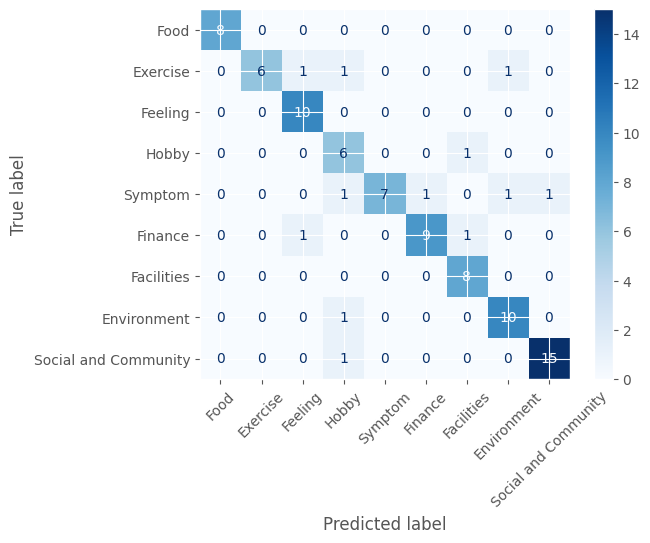


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.67      0.80         9
           2       0.83      1.00      0.91        10
           3       0.60      0.86      0.71         7
           4       1.00      0.64      0.78        11
           5       0.90      0.82      0.86        11
           6       0.80      1.00      0.89         8
           7       0.83      0.91      0.87        11
           8       0.94      0.94      0.94        16

    accuracy                           0.87        91
   macro avg       0.88      0.87      0.86        91
weighted avg       0.89      0.87      0.87        91



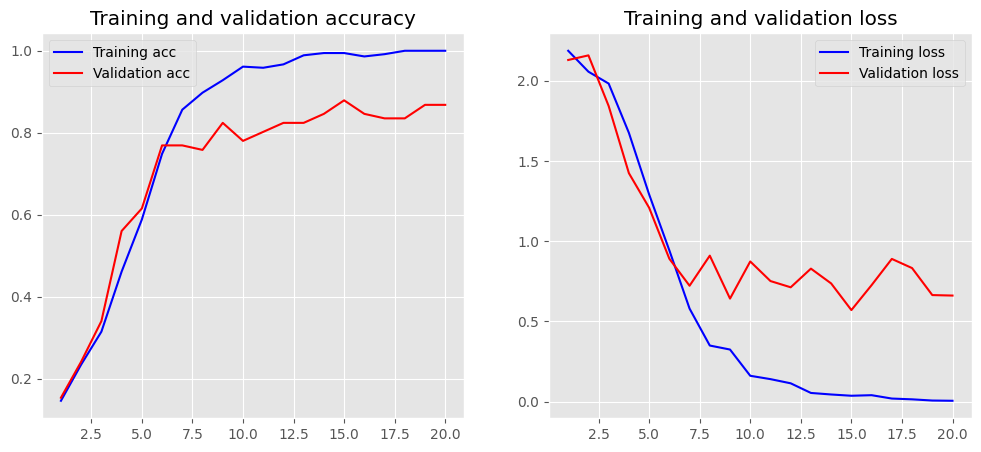

In [34]:
# Bi-LSTM

model = Sequential()
model.add(Embedding(input_dim=max_vocab,
                    output_dim=500,
                    input_length=max_len_sentence))
model.add(Bidirectional(LSTM(500)))
model.add(Dense(9, activation="softmax"))

lost_func = CategoricalCrossentropy()
otm = Adam(learning_rate=0.00091)
model.compile(optimizer=otm, loss=lost_func, metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=69, epochs=20, verbose=1)

y_predict = model.predict(x_test)
print(model.evaluate(x_test, y_test, verbose=1))
y_predict = np.argmax(y_predict, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_predict)
report = classification_report(np.argmax(y_test, axis=1), y_predict)
print("Confusion Matrix:")
plot_confusion_metrix(cm)

print("\nClassification Report:")
print(report)

plot_history(history)

In [35]:
input_word = "การเงินติดขัดทำอย่างไรดี"

input_sequence = word_tokenize(input_word, engine="newmm", keep_whitespace=False)

for i in range(len(input_sequence)) :
    if words_list.get(input_sequence[i]) != None :
        input_sequence[i] = words_list[input_sequence[i]]
    else :
        input_sequence[i] = 0

input_sequence = np.array([input_sequence])

input_data = pad_sequences(input_sequence, maxlen=max_len_sentence, padding='post')
logit = model.predict(input_data, batch_size=32)
predict = [pred for pred in np.argmax(logit,axis=1)][0]
print(predict, np.max(logit))

1/1 [==============================] - 0s 48ms/step
5 0.9185011


In [36]:
from keras import layers

Epoch 1/20
6/6 [==============================] - 4s 412ms/step - loss: 2.1562 - accuracy: 0.2459 - val_loss: 2.0828 - val_accuracy: 0.5275
Epoch 2/20
6/6 [==============================] - 2s 252ms/step - loss: 1.9498 - accuracy: 0.7901 - val_loss: 1.9669 - val_accuracy: 0.5604
Epoch 3/20
6/6 [==============================] - 2s 360ms/step - loss: 1.7536 - accuracy: 0.8564 - val_loss: 1.8263 - val_accuracy: 0.6703
Epoch 4/20
6/6 [==============================] - 1s 156ms/step - loss: 1.5418 - accuracy: 0.9171 - val_loss: 1.6641 - val_accuracy: 0.7802
Epoch 5/20
6/6 [==============================] - 1s 165ms/step - loss: 1.3042 - accuracy: 0.9309 - val_loss: 1.4828 - val_accuracy: 0.7802
Epoch 6/20
6/6 [==============================] - 1s 156ms/step - loss: 1.0504 - accuracy: 0.9558 - val_loss: 1.2964 - val_accuracy: 0.7912
Epoch 7/20
6/6 [==============================] - 1s 72ms/step - loss: 0.8036 - accuracy: 0.9696 - val_loss: 1.1164 - val_accuracy: 0.8132
Epoch 8/20
6/6 [=====

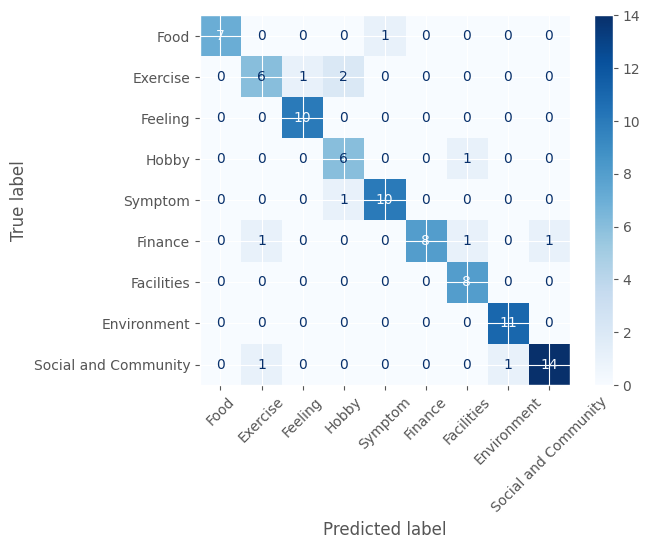


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.75      0.67      0.71         9
           2       0.91      1.00      0.95        10
           3       0.67      0.86      0.75         7
           4       0.91      0.91      0.91        11
           5       1.00      0.73      0.84        11
           6       0.80      1.00      0.89         8
           7       0.92      1.00      0.96        11
           8       0.93      0.88      0.90        16

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.87        91
weighted avg       0.89      0.88      0.88        91



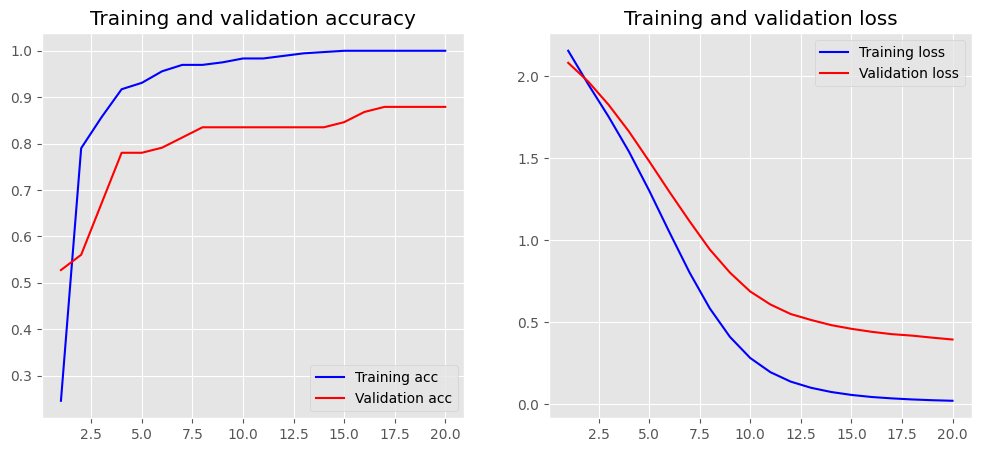

In [37]:
# CNN

model = Sequential();
model.add(Embedding(input_dim=max_vocab,
                    output_dim=500,
                    input_length=max_len_sentence))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(Dense(9, activation="softmax"))

lost_func = CategoricalCrossentropy()
otm = Adam(learning_rate=0.00091)
model.compile(optimizer=otm, loss=lost_func, metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=69, epochs=20, verbose=1)

y_predict = model.predict(x_test)
print(model.evaluate(x_test, y_test, verbose=1))
y_predict = np.argmax(y_predict, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_predict)
report = classification_report(np.argmax(y_test, axis=1), y_predict)
print("Confusion Matrix:")
plot_confusion_metrix(cm)

print("\nClassification Report:")
print(report)

plot_history(history)

Epoch 1/40
6/6 [==============================] - 4s 261ms/step - loss: 2.2022 - accuracy: 0.0912 - val_loss: 2.2148 - val_accuracy: 0.0879
Epoch 2/40
6/6 [==============================] - 1s 211ms/step - loss: 2.1935 - accuracy: 0.1105 - val_loss: 2.1704 - val_accuracy: 0.1978
Epoch 3/40
6/6 [==============================] - 2s 270ms/step - loss: 2.0687 - accuracy: 0.1796 - val_loss: 1.8502 - val_accuracy: 0.1978
Epoch 4/40
6/6 [==============================] - 1s 162ms/step - loss: 1.8943 - accuracy: 0.2017 - val_loss: 1.7713 - val_accuracy: 0.2967
Epoch 5/40
6/6 [==============================] - 1s 75ms/step - loss: 1.8275 - accuracy: 0.2127 - val_loss: 1.7601 - val_accuracy: 0.2308
Epoch 6/40
6/6 [==============================] - 1s 76ms/step - loss: 1.7142 - accuracy: 0.2348 - val_loss: 1.6988 - val_accuracy: 0.2747
Epoch 7/40
6/6 [==============================] - 1s 126ms/step - loss: 1.6157 - accuracy: 0.2624 - val_loss: 1.6452 - val_accuracy: 0.2967
Epoch 8/40
6/6 [======

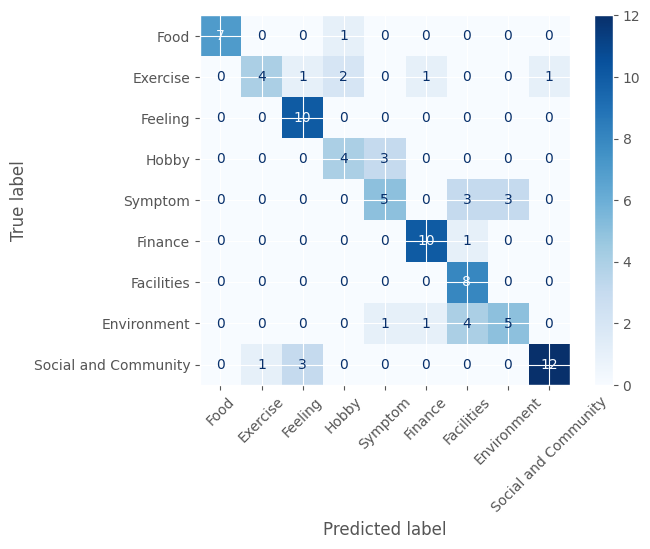


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.80      0.44      0.57         9
           2       0.71      1.00      0.83        10
           3       0.57      0.57      0.57         7
           4       0.56      0.45      0.50        11
           5       0.83      0.91      0.87        11
           6       0.50      1.00      0.67         8
           7       0.62      0.45      0.53        11
           8       0.92      0.75      0.83        16

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.70        91
weighted avg       0.74      0.71      0.71        91



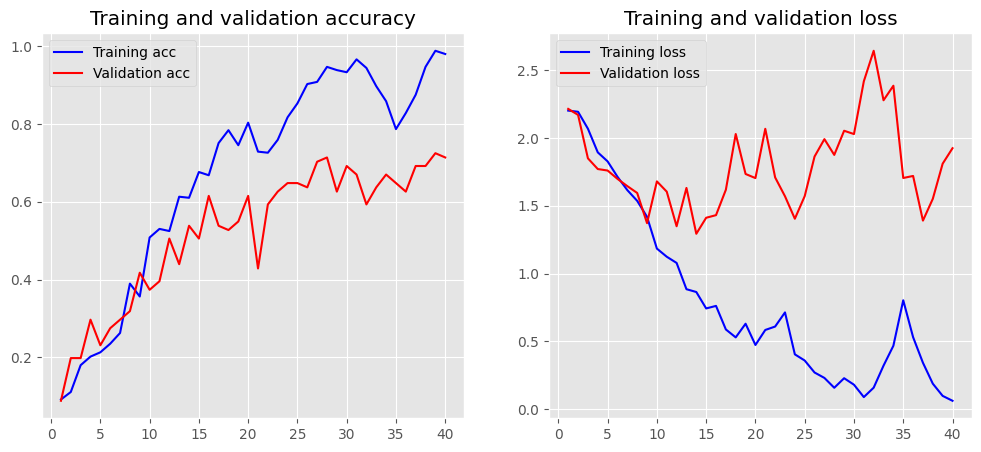

In [38]:
# LSTM

model = Sequential();
model.add(Embedding(input_dim=max_vocab,
                    output_dim=500,
                    input_length=max_len_sentence))
model.add(LSTM(500))
model.add(Dense(500, activation="relu"))
model.add(Dense(500, activation="relu"))
model.add(Dense(9, activation="softmax"))

lost_func = CategoricalCrossentropy()
otm = Adam(learning_rate=0.00091)
model.compile(optimizer=otm, loss=lost_func, metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=69, epochs=40, verbose=1)

y_predict = model.predict(x_test)
print(model.evaluate(x_test, y_test, verbose=1))
y_predict = np.argmax(y_predict, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_predict)
report = classification_report(np.argmax(y_test, axis=1), y_predict)
print("Confusion Matrix:")
plot_confusion_metrix(cm)

print("\nClassification Report:")
print(report)

plot_history(history)

Epoch 1/20
6/6 [==============================] - 3s 212ms/step - loss: 2.0720 - accuracy: 0.2486 - val_loss: 1.5876 - val_accuracy: 0.4396
Epoch 2/20
6/6 [==============================] - 1s 140ms/step - loss: 1.0468 - accuracy: 0.6851 - val_loss: 1.1270 - val_accuracy: 0.6703
Epoch 3/20
6/6 [==============================] - 1s 170ms/step - loss: 0.4343 - accuracy: 0.8867 - val_loss: 1.1782 - val_accuracy: 0.6374
Epoch 4/20
6/6 [==============================] - 1s 139ms/step - loss: 0.2363 - accuracy: 0.9309 - val_loss: 1.1934 - val_accuracy: 0.6264
Epoch 5/20
6/6 [==============================] - 1s 169ms/step - loss: 0.1174 - accuracy: 0.9751 - val_loss: 1.0695 - val_accuracy: 0.7033
Epoch 6/20
6/6 [==============================] - 1s 106ms/step - loss: 0.0616 - accuracy: 0.9890 - val_loss: 1.0820 - val_accuracy: 0.7143
Epoch 7/20
6/6 [==============================] - 1s 141ms/step - loss: 0.0315 - accuracy: 0.9972 - val_loss: 1.0299 - val_accuracy: 0.7253
Epoch 8/20
6/6 [====

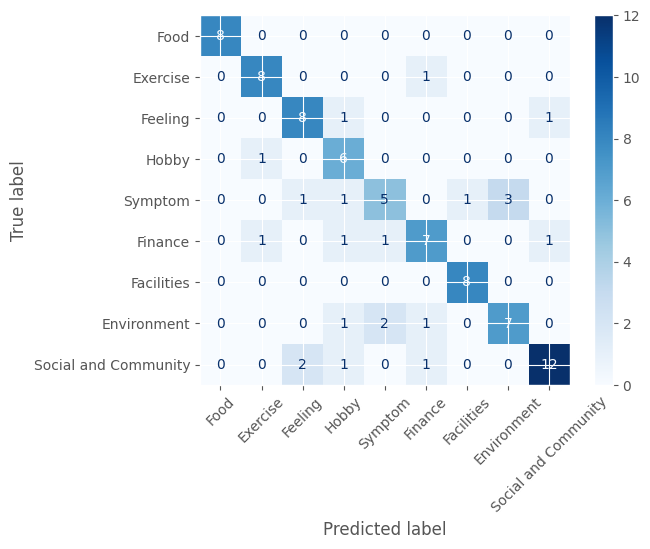


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.80      0.89      0.84         9
           2       0.73      0.80      0.76        10
           3       0.55      0.86      0.67         7
           4       0.62      0.45      0.53        11
           5       0.70      0.64      0.67        11
           6       0.89      1.00      0.94         8
           7       0.70      0.64      0.67        11
           8       0.86      0.75      0.80        16

    accuracy                           0.76        91
   macro avg       0.76      0.78      0.76        91
weighted avg       0.76      0.76      0.75        91



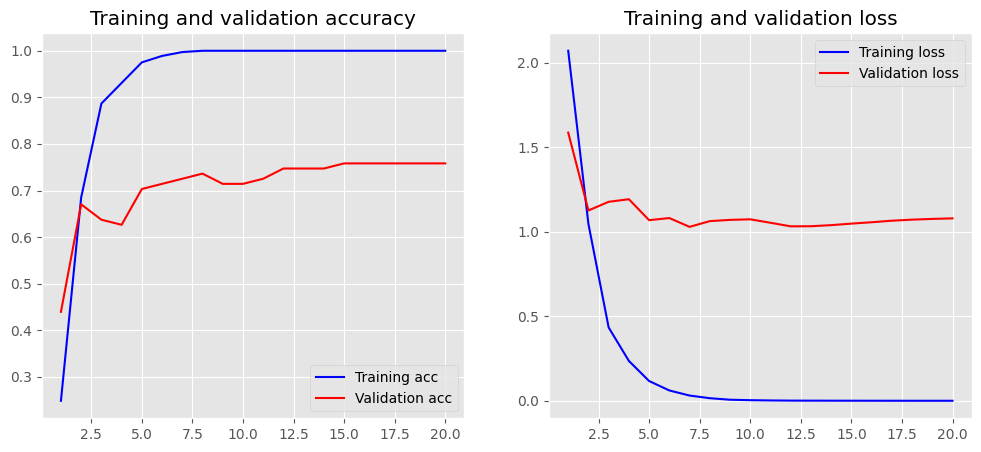

In [39]:
# normal RNN

model = Sequential();
model.add(Embedding(input_dim=max_vocab,
                    output_dim=500,
                    input_length=max_len_sentence))
model.add(layers.SimpleRNN(500))
model.add(Dense(9, activation="softmax"))

lost_func = CategoricalCrossentropy()
otm = Adam(learning_rate=0.00091)
model.compile(optimizer=otm, loss=lost_func, metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=69, epochs=20, verbose=1)

y_predict = model.predict(x_test)
print(model.evaluate(x_test, y_test, verbose=1))
y_predict = np.argmax(y_predict, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_predict)
report = classification_report(np.argmax(y_test, axis=1), y_predict)
print("Confusion Matrix:")
plot_confusion_metrix(cm)

print("\nClassification Report:")
print(report)

plot_history(history)